# Análise exploratória inicial dos dados de Expectativa de Vida

Equipe: Avelar Hostalácio, Carolina Brandão, Daniel Andrade, Enzo Pierazolli, Iago Gabino

## Leitura inicial do dataset e correção de colunas

Substituindo a coluna Economy_status_Developed para 'developed' booleana:

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv('Life-Expectancy-Data.csv')

dataset.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


Contando linhas e colunas:

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

## Reorganizando os dados do banco de dados

Dropamos algumas colunas que consideramos irrelevantes pro projeto e renomeamos outras, para facilitar a visualização/manipulação posterior dos dados.

In [18]:
dataset.drop(['Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Economy_status_Developing'], axis=1, inplace=True)

In [19]:
##trocas developing e developed por true e false
dataset.rename(columns={'Economy_status_Developed':'developed'}, inplace=True)
dataset["developed"] = dataset["developed"].astype(bool)
dataset['developed'].unique()

array([False,  True])

In [20]:
# renomear colunas com nomes com letra minuscula e no formato nome_da_coluna
dataset.rename(columns={'Country':'country', 'Region':'region', 'Year':'year', 'Infant_deaths':'infant_deaths', 'Under_five_deaths':'under_five_deaths', 'Adult_mortality':'adult_mortality', 'Alcohol_consumption':'alcohol_consumption', 'Hepatitis_B':'hepatitis_b', 'Measles':'measles', 'BMI':'bmi', 'Polio':'polio', 'Diphtheria':'diphtheria', 'Incidents_HIV':'incidents_hiv', 'GDP_per_capita':'gdp_per_capita', 'Population_mln':'population_mln', 'Schooling':'schooling', 'Life_expectancy':'life_expectancy'}, inplace=True)

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              2864 non-null   object 
 1   region               2864 non-null   object 
 2   year                 2864 non-null   int64  
 3   infant_deaths        2864 non-null   float64
 4   under_five_deaths    2864 non-null   float64
 5   adult_mortality      2864 non-null   float64
 6   alcohol_consumption  2864 non-null   float64
 7   hepatitis_b          2864 non-null   int64  
 8   measles              2864 non-null   int64  
 9   bmi                  2864 non-null   float64
 10  polio                2864 non-null   int64  
 11  diphtheria           2864 non-null   int64  
 12  incidents_hiv        2864 non-null   float64
 13  gdp_per_capita       2864 non-null   int64  
 14  population_mln       2864 non-null   float64
 15  schooling            2864 non-null   f

## Plots para análise inicial de dados

<Axes: xlabel='year', ylabel='life_expectancy'>

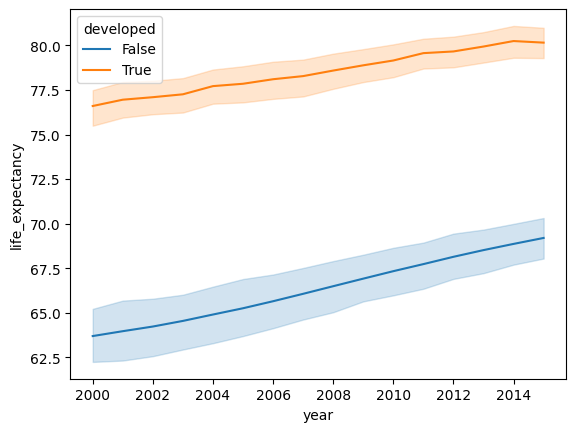

In [22]:
sns.lineplot(x = "year", y = "life_expectancy", hue = "developed", data = dataset)

<Axes: xlabel='year', ylabel='life_expectancy'>

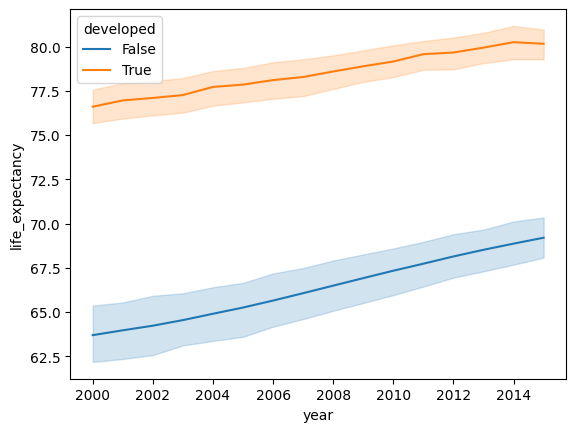

In [23]:
sns.lineplot(x = "year", y = "life_expectancy", hue = "developed", data = dataset)

<Axes: xlabel='year', ylabel='life_expectancy'>

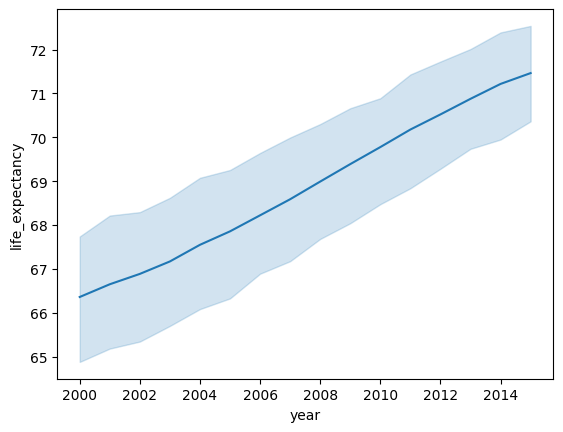

In [24]:
sns.lineplot(x = "year", y = "life_expectancy", data = dataset)

<Axes: xlabel='gdp_per_capita', ylabel='life_expectancy'>

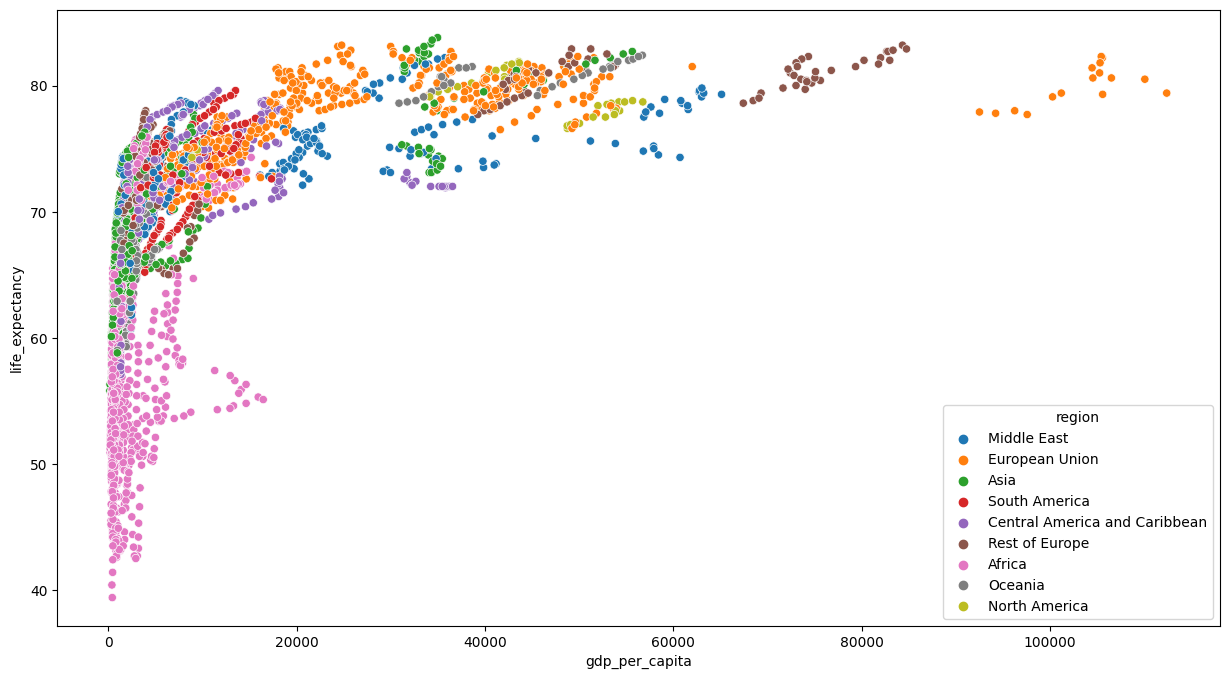

In [25]:
f, ax = plt.subplots(figsize=(15, 8))
sns.scatterplot(x="gdp_per_capita", y="life_expectancy",hue="region", data= dataset)

<Axes: xlabel='life_expectancy', ylabel='Count'>

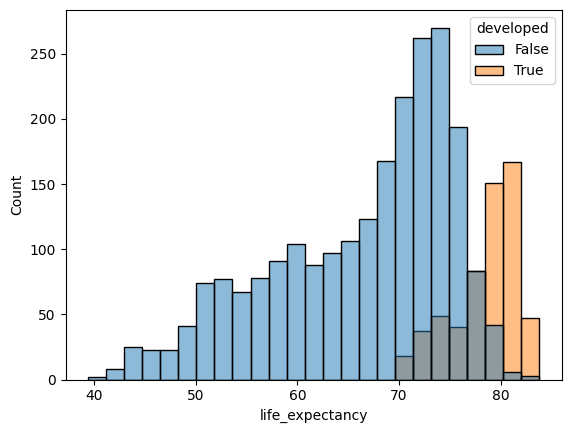

In [26]:
#plot an histogram
sns.histplot(x='life_expectancy', hue='developed', data=dataset)

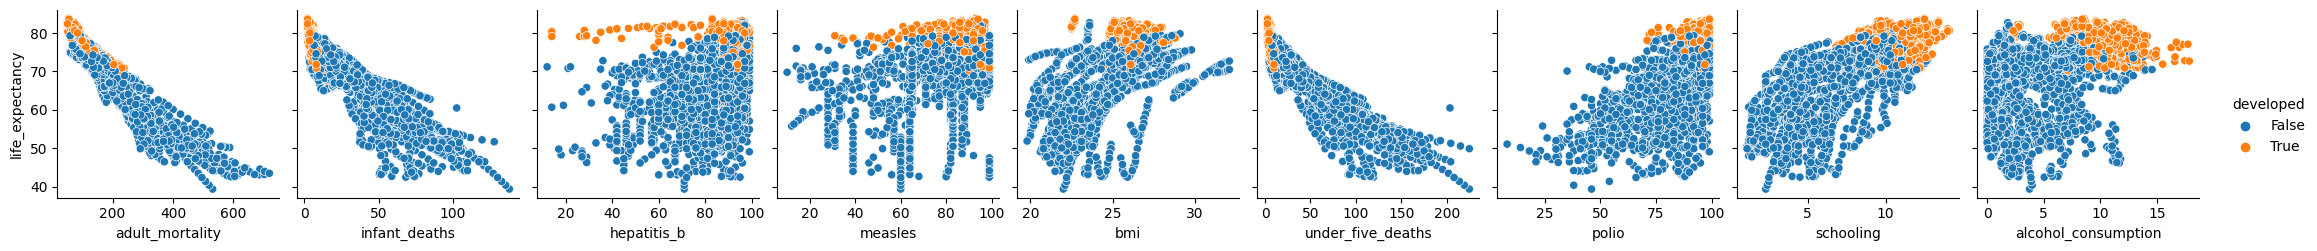

In [27]:
sns.pairplot(dataset, hue='developed', y_vars='life_expectancy', x_vars=['adult_mortality', 'infant_deaths', 'hepatitis_b', 'measles', 'bmi', 'under_five_deaths', 'polio', 'schooling', 'alcohol_consumption'])


## Consumo de Álcool e a Expectativa de Vida

A partir do pairplot anterior, percebemos que há uma aparente correlação positiva entre o consumo de álcool e a expectativa de vida.

<Axes: xlabel='alcohol_consumption', ylabel='life_expectancy'>

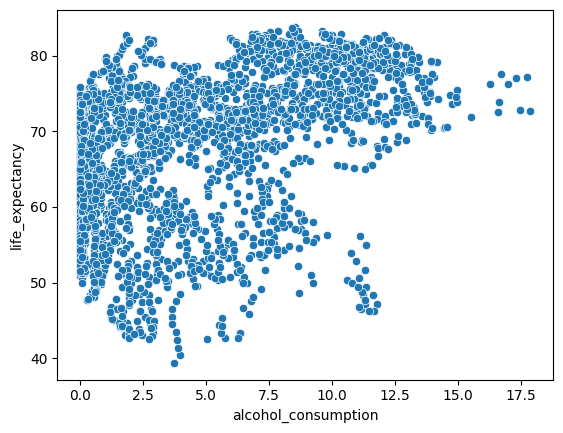

In [48]:
sns.scatterplot(x='alcohol_consumption', y='life_expectancy', data=dataset)

Calculando a correlação entre as duas variáveis:

In [55]:
from scipy import stats

# calcula a correlação entre as variáveis
pearson_coef, p_value = stats.pearsonr(dataset['alcohol_consumption'], dataset['life_expectancy'])
print("Correlação de Pearson: ", pearson_coef, "\nP-valor: ", p_value)

Correlação de Pearson:  0.39915910757917294 
P-valor:  5.155487984931601e-110


Dado que a Correlação de Pearson entre as duas variáveis é de 0.39, podemos dizer que há uma correlação positiva entre as duas variáveis, mas não muito forte. Além disso, um p-valor próximo de 0 indica que a correlação é estatisticamente significativa. Porém, não podemos afirmar que o consumo de álcool é a causa da expectativa de vida, pois correlação não implica causalidade.

Para analisar melhor a correlação entre as duas variáveis, vamos dividir os países em faixas de IDH. Antes disso, é necessário fazer uma aproximação para o IDH no dataset, dado que não há essa informação. 
Para aproximar o IDH vamos levar em consideração a expectativa de vida, a escolaridade e o PIB per capita, dados que possuímos em nosso dataset, de forma simplificada, apenas para fins de análise.

In [104]:
# Remover quaisquer linhas com dados ausentes
df = dataset.dropna(subset=['life_expectancy', 'schooling', 'gdp_per_capita'])

# Normalizar a expectativa de vida, a escolaridade e o PIB per capita, para que fiquem entre 0 e 1
df['life_expectancy'] = (df['life_expectancy'] - df['life_expectancy'].min()) / (df['life_expectancy'].max() - df['life_expectancy'].min())
df['schooling'] = (df['schooling'] - df['schooling'].min()) / (df['schooling'].max() - df['schooling'].min())
df['gdp_per_capita'] = (df['gdp_per_capita'] - df['gdp_per_capita'].min()) / (df['gdp_per_capita'].max() - df['gdp_per_capita'].min())

# Calcular o IDH como a média geométrica dos três componentes
dataset['HDI'] = np.cbrt(df['life_expectancy'] * df['schooling'] * df['gdp_per_capita'])

Além disso, iremos definir 5 faixas de IDH para facilitar a análise:

<Axes: xlabel='alcohol_consumption', ylabel='life_expectancy'>

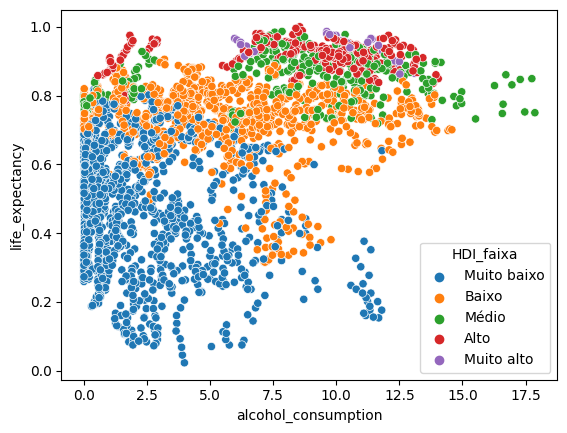

In [105]:
# Definir os limites das faixas de IDH
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]

# Definir os nomes das faixas
labels = ['Muito baixo', 'Baixo', 'Médio', 'Alto', 'Muito alto']

# Criar a nova coluna
dataset['HDI_faixa'] = pd.cut(dataset['HDI'], bins=bins, labels=labels)

sns.scatterplot(x='alcohol_consumption', y='life_expectancy', data=df, hue='HDI_faixa')

Dessa forma, podemos analisar a correlação entre as duas variáveis para cada faixa de IDH:

In [106]:
# Definir os nomes das faixas
labels = ['Muito baixo', 'Baixo', 'Médio', 'Alto', 'Muito alto']

# Loop através das faixas de IDH
for label in labels:
    # Filtrar o DataFrame para apenas as linhas com a faixa de IDH atual
    df_faixa = dataset[dataset['HDI_faixa'] == label]
    
    # Calcular a correlação entre a expectativa de vida e o consumo de álcool
    corr = df_faixa[['life_expectancy', 'alcohol_consumption']].corr(method='pearson').iloc[0, 1]
    
    # Imprimir a correlação
    print(f'Correlação entre expectativa de vida e consumo de álcool para IDH {label}: {corr}')


Correlação entre expectativa de vida e consumo de álcool para IDH Muito baixo: -0.20868268212663454
Correlação entre expectativa de vida e consumo de álcool para IDH Baixo: -0.1286869204656736
Correlação entre expectativa de vida e consumo de álcool para IDH Médio: 0.1894658858829138
Correlação entre expectativa de vida e consumo de álcool para IDH Alto: 0.046868786351310046
Correlação entre expectativa de vida e consumo de álcool para IDH Muito alto: -0.3268283470119636


Analisando novamente o consumo de álcool e a expectativa de vida, de acordo com as faixas de IDH, percebemos que a correlação original de 0.39 não é observada com a mesma intensidade em todas as faixas. Na verdade, notamos uma correlação mais baixa, ou até mesmo negativa, entre as duas variáveis.
Assim sendo, `podemos dizer que o IDH é uma variável de confusão na relação entre o consumo de álcool e a expectativa de vida` e que, portanto, não podemos afirmar que o consumo de álcool é um fator tão determinante para a expectativa de vida, como parecia ser a partir da análise inicial.